🎯 **Project Objective:**
Geographical and structural analysis of the world's 2,000 largest companies in 2025 to identify global trends in company registration, types of legal structures, and the geographical concentration of economic activities.

**Key Research Questions:**
- Which countries have the highest number of large corporations?
- What are the most common legal forms of companies?
- Which industries (based on classification) are dominant?
- Is there a relationship between countries, legal forms, and industry sectors?


Your file contains data on the world’s 2,000 largest companies in 2025. Each row has a complex nested JSON structure, with columns containing hierarchical (nested) data. The main columns are as follows:

📦 **Available Columns:**
- **names**: A list of company names (including legal name, etc.).
- **legalForm**: The legal form of the company (e.g., Corporation).
- **identifiers**: Various identifiers (such as VAT, EIN).
- **addresses**: Includes country, region, address details, etc.
- **profile**: Contains classifications, business activities, industry codes, etc.


🛠 **Step 1: Data Understanding**

Our next step is to extract and flatten the nested JSON structures to build an analyzable DataFrame.

We aim to visualize key fields such as **Country**, **Company Name**, **Legal Form**, and **Industry Classification**.

Let's start by extracting the following fields:
- `legal_name`
- `country`
- `legal_form`
- `industry_code` (e.g., NAICS or equivalent)

I will now proceed with these transformations.


In [30]:
import pandas as pd                                       # pandas library for working with tabular data (DataFrames)
import json                                               # json library for reading and writing JSON data
import matplotlib.pyplot as plt                           # matplotlib library for creating plots and charts
import seaborn as sns                                     # seaborn library for advanced and beautiful statistical visualizations
from sklearn.preprocessing import LabelEncoder            # LabelEncoder module from scikit-learn for converting categorical text data into numeric labels (Encoding labels)

In [5]:
df = pd.read_json('cdq-2k-largest-companies-2025.ndjson', lines=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   names        2000 non-null   object
 1   legalForm    2000 non-null   object
 2   identifiers  2000 non-null   object
 3   addresses    2000 non-null   object
 4   profile      2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [7]:
df.head(5)

,names,legalForm,identifiers,addresses,profile
0,"[{'type': {'name': 'Legal Name', 'url': 'https...",{'name': 'Corporation'},[{'type': {'url': 'https://meta.cdq.com/Employ...,"[{'country': {'shortName': 'US', 'value': 'Uni...",{'classifications': [{'type': {'name': 'Statis...
1,"[{'type': {'name': 'Legal Name', 'url': 'https...","{'name': 'Incorporated', 'url': 'https://meta....",[{'type': {'url': 'https://meta.cdq.com/Employ...,"[{'country': {'shortName': 'US', 'value': 'Uni...",{'classifications': [{'type': {'name': 'Statis...
2,"[{'type': {'name': 'Legal Name', 'url': 'https...",{},[{'type': {'url': 'https://meta.cdq.com/Legal_...,"[{'country': {'shortName': 'CN', 'value': 'Chi...",{'classifications': [{'type': {'name': 'Statis...
3,"[{'type': {'name': 'Legal Name', 'url': 'https...","{'name': 'Company', 'url': 'https://meta.cdq.c...",[{'type': {'url': 'https://meta.cdq.com/VAT_Re...,"[{'country': {'shortName': 'SA', 'value': 'Sau...",{'classifications': [{'type': {'name': 'Statis...
4,"[{'type': {'name': 'Legal Name', 'url': 'https...","{'name': 'Incorporated', 'url': 'https://meta....",[{'type': {'url': 'https://meta.cdq.com/Employ...,"[{'country': {'shortName': 'US', 'value': 'Uni...",{'classifications': [{'type': {'name': 'Statis...


In [8]:
df.columns

Index(['names', 'legalForm', 'identifiers', 'addresses', 'profile'], dtype='object')

In [11]:
df.iloc[0]

names          [{'type': {'name': 'Legal Name', 'url': 'https...
legalForm                                {'name': 'Corporation'}
identifiers    [{'type': {'url': 'https://meta.cdq.com/Employ...
addresses      [{'country': {'shortName': 'US', 'value': 'Uni...
profile        {'classifications': [{'type': {'name': 'Statis...
Name: 0, dtype: object

In [13]:
df = df.rename(columns={'names':'Names', 'legalForm':'Legal Form', 'identifiers':'Identifiers', 'addresses':'Addresses', 'profile':'Profile'})

In [32]:
def extract_legal_name(name_list):
    if not isinstance(name_list, list):
        return None
    for name in name_list:
        if name.get("type", {}).get("Name") == 'Legal Name':
            return name.get('value')
    return None
df.head()

df['Legal_Name'] = df['Names'].apply(extract_legal_name)

✅ **Step 2: Initial Data Familiarization (Data Understanding)**

In this step, our goal is to gain an overall understanding of the dataset, including:

- General overview of the dataset content
- Data types and structures
- Completeness and missing data assessment
- Basic statistical patterns and distributions


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Names        2000 non-null   object
 1   Legal Form   2000 non-null   object
 2   Identifiers  2000 non-null   object
 3   Addresses    2000 non-null   object
 4   Profile      2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [26]:
df.describe(include='all')

,Names,Legal Form,Identifiers,Addresses,Profile
count,2000,2000,2000,2000,2000
unique,2000,103,1245,1979,2000
top,"[{'type': {'name': 'Legal Name', 'url': 'https...",{},[],"[{'country': {'shortName': 'US', 'value': 'Uni...",{'classifications': [{'type': {'name': 'Statis...
freq,1,373,756,10,1


In [27]:
df.isnull().sum()

Names          0
Legal Form     0
Identifiers    0
Addresses      0
Profile        0
dtype: int64

In [40]:
addresses_exploded = df.explode('Addresses')                                        # Each address on a separate line
addresses_normalized = pd.json_normalize(addresses_exploded['Addresses'])           # Convert dict to independent columns

identifiers_exploded = df.explode('Identifiers')
identifiers_normalized = pd.json_normalize(identifiers_exploded['Identifiers'])



df["legal_form_name"].value_counts()
df["Addresses"].value_counts()
df["Identifiers"].value_counts()


Identifiers
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [32]:
df["Addresses"].iloc[0]

[{'country': {'shortName': 'US', 'value': 'United States of America'},
  'administrativeAreas': [{'value': 'New York',
    'fipsCode': '36',
    'shortName': 'NY',
    'type': {'name': 'Region',
     'url': 'https://meta.cdq.com/Address/administrative_area/type/region',
     'technicalKey': 'REGION'}},
   {'value': 'New York',
    'fipsCode': '36061',
    'shortName': 'New York',
    'type': {'name': 'County',
     'url': 'https://meta.cdq.com/Address/administrative_area/type/county',
     'technicalKey': 'COUNTY'}}],
  'postCodes': [{'value': '10017-3217',
    'type': {'name': 'Regular',
     'url': 'https://meta.cdq.com/Address/post_code/type/regular',
     'technicalKey': 'REGULAR'}}],
  'localities': [{'type': {'name': 'City',
     'url': 'https://meta.cdq.com/Address/locality/type/city',
     'technicalKey': 'CITY'},
    'shortName': 'New York',
    'value': 'New York'},
   {'type': {'name': 'District',
     'url': 'https://meta.cdq.com/Address/locality/type/district',
     'techn

✅ **Step 3: Data Cleaning**

1. **Identifying and Handling Missing Values**
For key columns:
- `country`
- `legal_form`
- `legal_name`

🔧 Possible actions:
- If only a small portion of rows have missing values → Remove those rows.
- If a large portion of rows have missing values → Investigate the root cause or impute with the most common value.

2. **Handling Outliers**
Currently, since we don’t have numerical columns, outlier detection is not applicable at this stage.

3. **Data Standardization**
Examples:
- Normalize legal forms, e.g., converting "Corporation" and "corporation" to a consistent format.
- Standardize country names if inconsistencies exist (e.g., "US" vs "USA").


In [26]:
#Remove rows that do not have a legal name or country (very basic)
df_cleand = df.dropna(subset=["Legal Form", "Addresses"])

# Remove Null values in legal_form only if there are few.
if df_cleand["Legal Form"].isnull().mean() < 0.1:
    df_cleand = df_cleand.dropna(subset=["Legal Form"])

# Standardize legal_form to lowercase for better aggregation
df_cleand["Legal Form"] = df_cleand["Legal Form"].astype(str).str.strip().str.lower()

df_cleand.isnull().sum()


Names                    0
Legal Form               0
Identifiers              0
Addresses                0
Profile                  0
Formatted_Address        0
legal_form_name        373
standard_legal_form      0
legal_form_coded         0
Address_code             0
region                   0
name_length              0
Address_count            0
dtype: int64

In [27]:
def format_address(address_list):
    if isinstance(address_list, list) and len(address_list) > 0:
        address = address_list[0]
        city = address.get('city', {}).get('name')
        country = address.get('country', {}).get('shortName')
        if city and country:
            return f"{city}, {country}"
        elif country:
            return country
    return None

df['Formatted_Address'] = df['Addresses'].apply(format_address)
df["Formatted_Address"] = df["Addresses"].apply(format_address)


def standardize_legal_form(legal_form):
    if not isinstance(legal_form, str):
        return None
    legal_form = legal_form.strip().lower()
    
    if "inc" in legal_form or "corporation" in legal_form or "corp" in legal_form:
        return "Corporation"
    elif "ltd" in legal_form or "limited" in legal_form:
        return "Limited"
    elif "ag" in legal_form:
        return "AG"
    elif "株式会社" in legal_form:
        return "Kabushiki Gaisha"
    elif "gmbh" in legal_form:
        return "GmbH"
    elif "s.a." in legal_form or "sociedad anónima" in legal_form:
        return "S.A."
    else:
        return legal_form.title()
    

# Extract 'name' from the Legal Form dictionary
df['legal_form_name'] = df['Legal Form'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Run the standardization function on legal_form_name
df['standard_legal_form'] = df['legal_form_name'].apply(standardize_legal_form)

# Final cleaning (if needed)
df['standard_legal_form'] = df['standard_legal_form'].astype(str).str.strip().str.title()
df['standard_legal_form'] = df['standard_legal_form'].replace("None", pd.NA).fillna("Unknown")

✅ **Step 4: Exploratory Data Analysis (EDA)**

1. **Country Distribution (Top N Countries)**
Analyze which countries have the highest number of large corporations.
- Visualize with a **Bar Plot**.

2. **Legal Form Distribution**
Explore the most common legal structures across companies.
- Visualize with a **Bar Plot**.

3. **Country vs Legal Form Relationship**
Investigate which legal forms are dominant in specific countries.
- Visualize with a **Heatmap** or **Grouped Bar Plot**.

4. **Data Anomaly Detection**
Identify unusual patterns, such as a legal form appearing in an illogical country (e.g., “株式会社” in the USA).
This will help spot potential data quality issues.


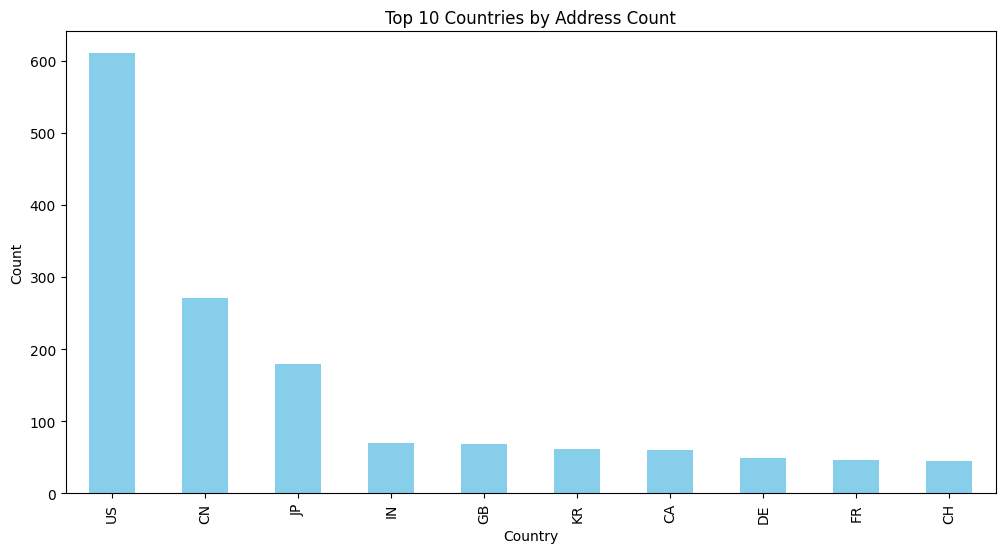

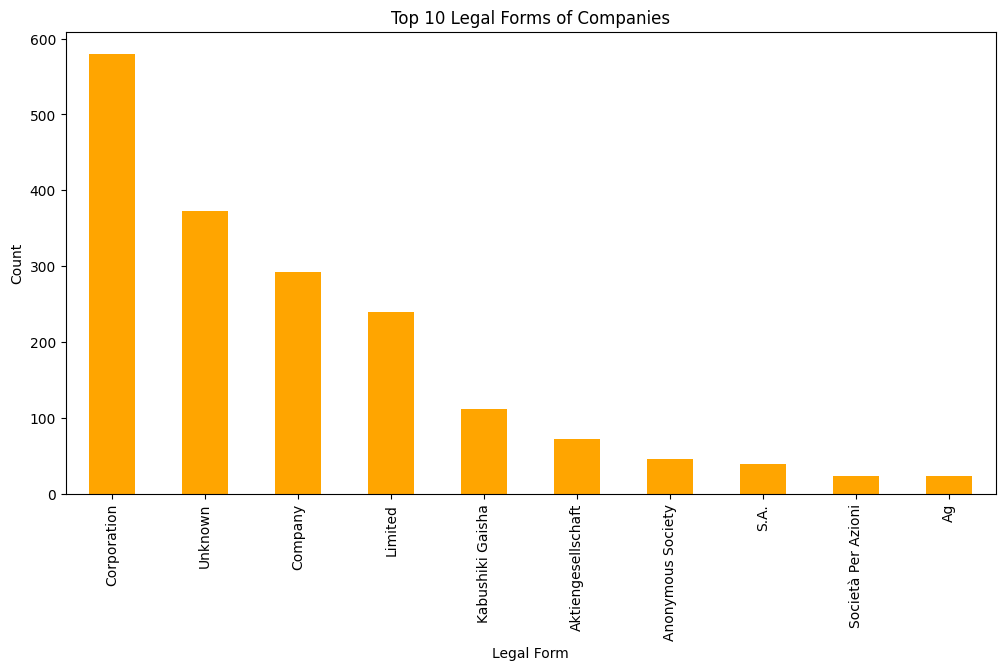

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20219 (\N{CJK UNIFIED IDEOGRAPH-4EFB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21311 (\N{CJK UNIFIED IDEOGR

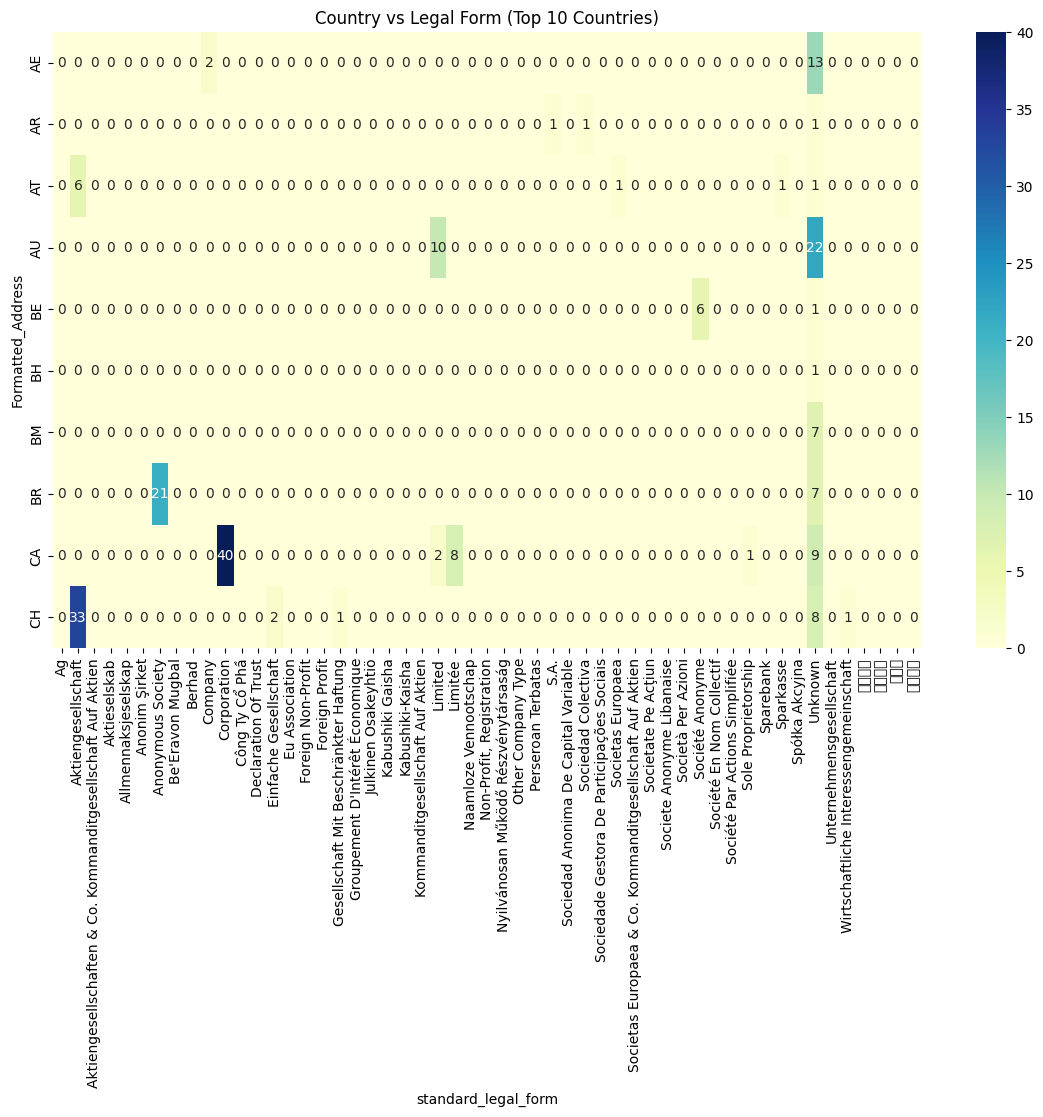

In [17]:


plt.figure(figsize=(12, 6))
df["Formatted_Address"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Countries by Address Count")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12,6))
df['standard_legal_form'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Legal Forms of Companies')
plt.xlabel('Legal Form')
plt.ylabel('Count')
plt.show()


# 3. Country vs Legal Form (Pivot Table)
pivot_table = df.pivot_table(index='Formatted_Address', columns='standard_legal_form', aggfunc='size', fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_table.head(10), annot=True, fmt="d", cmap='YlGnBu')
plt.title('Country vs Legal Form (Top 10 Countries)')
plt.show()

✅ **Step 5: Data Visualization**

🎯 **Objective of this step:**
- Visualize the distribution of **Legal Forms**.
- Visualize the distribution of **Countries**.
- Analyze the relationship between **Country ↔ Legal Form** using a **Heatmap**.


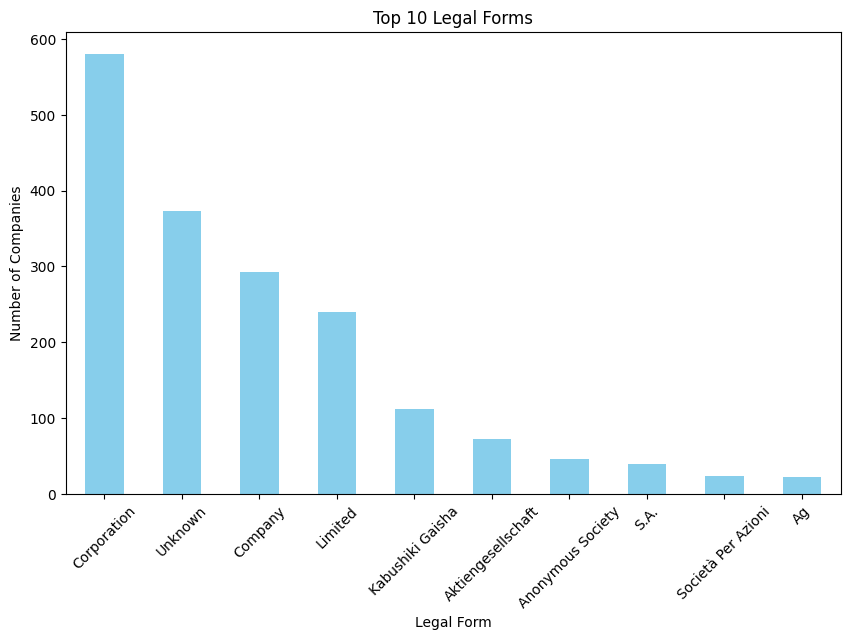

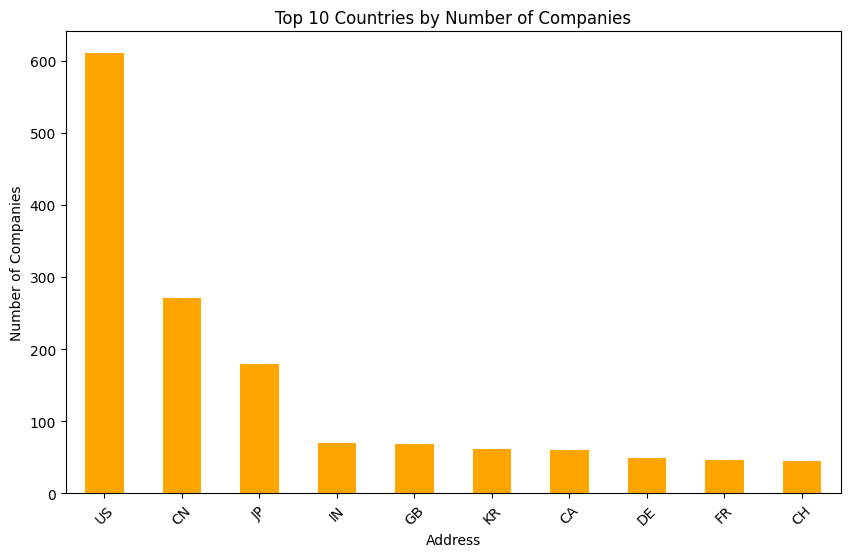

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 20219 (\N{CJK UNIFIED IDEOGRAPH-4EFB}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21311 (\N{CJK UNIFIED IDEOGR

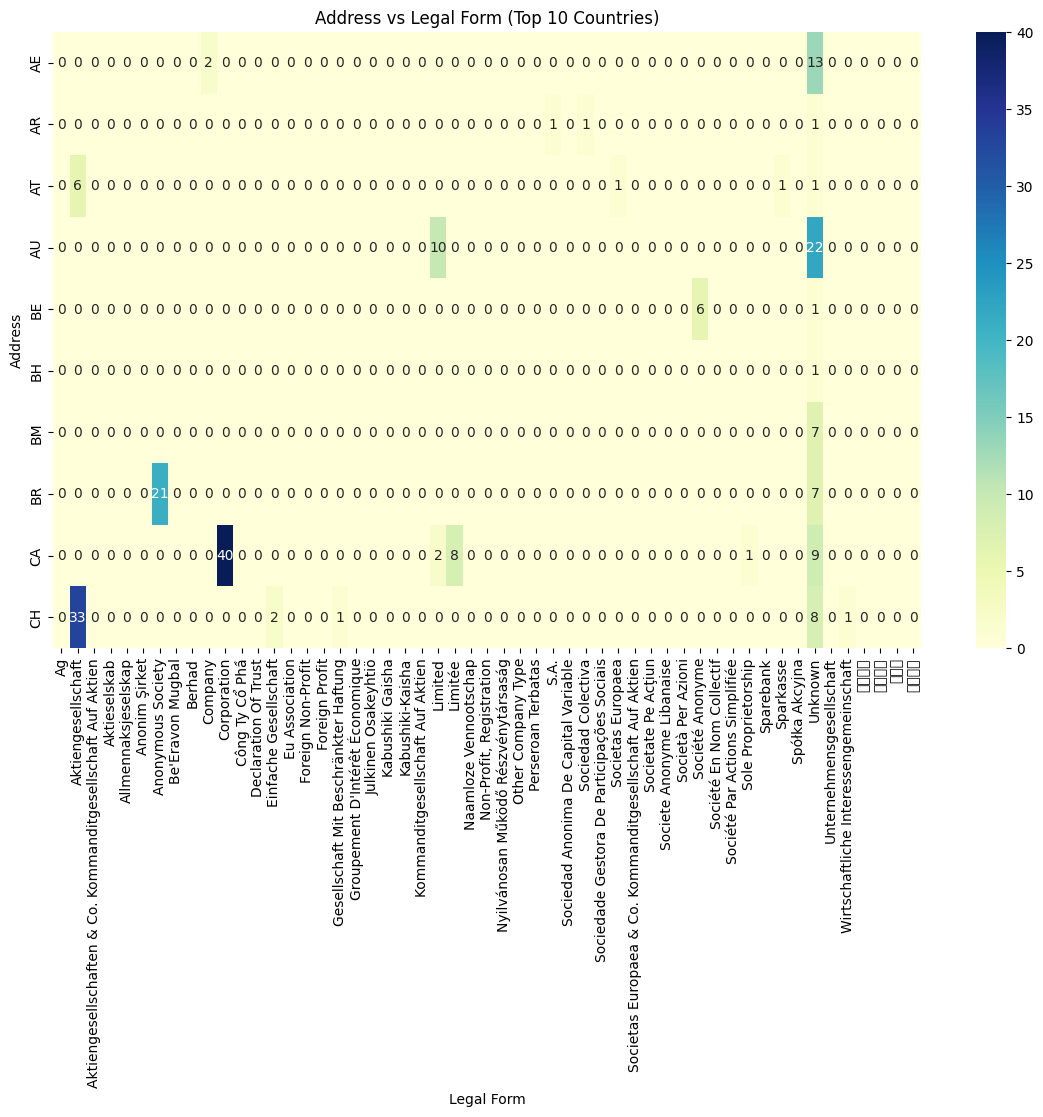

In [28]:

plt.figure(figsize=(10,6))
df['standard_legal_form'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Legal Forms')
plt.xlabel('Legal Form')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10,6))
df['Formatted_Address'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries by Number of Companies')
plt.xlabel('Address')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()


pivot_table = df.pivot_table(index='Formatted_Address', columns='standard_legal_form', aggfunc='size', fill_value=0)

plt.figure(figsize=(14,8))
sns.heatmap(pivot_table.head(10), annot=True, fmt="d", cmap='YlGnBu')
plt.title('Address vs Legal Form (Top 10 Countries)')
plt.xlabel('Legal Form')
plt.ylabel('Address')
plt.show()



✅ **What is our Feature Engineering goal?**

From raw data (text, nested fields, etc.), create features that allow us to:

- Train Machine Learning models.
- Perform more precise statistical analyses.

🎯 **Feature Engineering ideas for your data:**

1. Convert **Legal Form** to numerical features (One-Hot / Label Encoding)  
   Feature → `legal_form_coded`

2. Extract **Country Code** (e.g., US, DE, JP)  
   Feature → `country_code`

3. Create a **Region** feature from Country (e.g., USA → North America)  
   Feature → `region`

4. Calculate the **Company Name Length**  
   Feature → `name_length`

5. Count the number of registered addresses  
   Feature → `address_count`


In [29]:

# Legal Form Encoding
le = LabelEncoder()
df['legal_form_coded'] = le.fit_transform(df['standard_legal_form'])

# Country Code → Assume we have a Country Code in the data (or you extracted it)
df['Address_code'] = df['Addresses'].astype(str).str.upper().str[:2]

# Region mapping
def map_region(country_code):
    if country_code in ['US', 'CA', 'MX']:
        return 'North America'
    elif country_code in ['DE', 'FR', 'UK', 'IT', 'ES']:
        return 'Europe'
    elif country_code in ['JP', 'CN', 'KR']:
        return 'Asia'
    else:
        return 'Other'
df['region'] = df['Address_code'].apply(map_region)

#Company Name Length
df['name_length'] = df['Names'].apply(lambda x: len(x) if isinstance(x, str) else 0)
df['name_length'] = df['name_length'].apply(lambda x: len(x) if isinstance(x, str) else 0)

#Address Count
df['Address_count'] = df ['Addresses'].apply(lambda x: len(x) if isinstance(x, list) else 0)


In [33]:
df.columns

Index(['Names', 'Legal Form', 'Identifiers', 'Addresses', 'Profile',
       'Formatted_Address', 'legal_form_name', 'standard_legal_form',
       'legal_form_coded', 'Address_code', 'region', 'name_length',
       'Address_count', 'Legal_Name'],
      dtype='object')